In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
## SET RANDOM SET REPRODUCIBILITY
torch.manual_seed(42)

In [10]:
pwd

'a:\\Deep Learning Coursera\\PyTorch_Basics'

In [11]:
df=pd.read_csv("fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


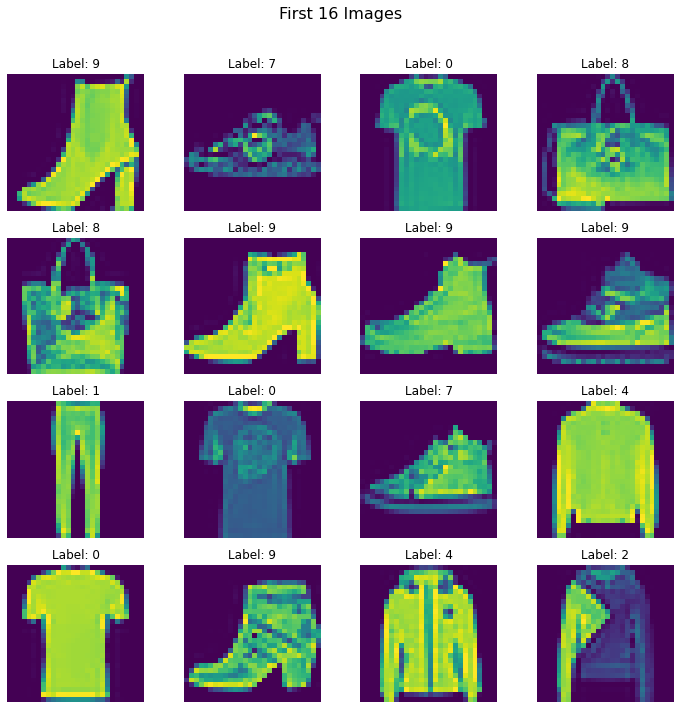

In [12]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [13]:
## Train test split 
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
## SCALING THE FEATURES
X_train=X_train/255.0
X_test=X_test/255.0


In [16]:
## CREATE CUSTOMDATASET CLASS

class customDataset(Dataset):
    def __init__(self, features, labels ):
        self.features = torch.tensor(features,dtype=torch.float32)
        self.labels=torch.tensor(labels,dtype=torch.long)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [17]:
## CREATE TRAIN_DATASET OBJECT
train_dataset=customDataset(X_train,y_train)


In [18]:
len(train_dataset)

4800

In [19]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [20]:
## CREATE TEST_DATASET OBJECT
test_dataset=customDataset(X_test,y_test)

In [21]:
## CREATE TRAIN AND TEST LOADER
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [27]:
## DEFINE A  NN CLASS
class MyNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.model(x)

In [28]:
## SET LEARNING_RATE AND EPOCHS
epoch=100
learning_rate=0.1

In [29]:
## INSTATIATE THE MODEL
model=MyNN(X_train.shape[1])
## LOSS FUNCTION
criterion=nn.CrossEntropyLoss()

## OPTIMIZER
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)


In [30]:
## TRAINING LOOP

for epoch in range(epoch):
    total_epoch_loss=0
    for batch_features,batch_labels in train_loader:
        # FORWARD PASS
        outputs=model(batch_features)

        # CALCULATE LOSS
        loss=criterion(outputs,batch_labels)
        optimizer.zero_grad()
        
        ## BACKWARD PASS
        loss.backward()

        ## UPDATE GRADIENT
        optimizer.step()
        total_epoch_loss+=loss.item()
    avg_loss=total_epoch_loss/len(train_loader)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')

Epoch 1, Loss: 1.3198
Epoch 2, Loss: 0.7731
Epoch 3, Loss: 0.6605
Epoch 4, Loss: 0.5824
Epoch 5, Loss: 0.5376
Epoch 6, Loss: 0.4871
Epoch 7, Loss: 0.4691
Epoch 8, Loss: 0.4403
Epoch 9, Loss: 0.4207
Epoch 10, Loss: 0.3931
Epoch 11, Loss: 0.3895
Epoch 12, Loss: 0.3693
Epoch 13, Loss: 0.3483
Epoch 14, Loss: 0.3442
Epoch 15, Loss: 0.3157
Epoch 16, Loss: 0.3171
Epoch 17, Loss: 0.3057
Epoch 18, Loss: 0.2936
Epoch 19, Loss: 0.2758
Epoch 20, Loss: 0.2763
Epoch 21, Loss: 0.2618
Epoch 22, Loss: 0.2428
Epoch 23, Loss: 0.2455
Epoch 24, Loss: 0.2343
Epoch 25, Loss: 0.2249
Epoch 26, Loss: 0.2161
Epoch 27, Loss: 0.2160
Epoch 28, Loss: 0.2054
Epoch 29, Loss: 0.1999
Epoch 30, Loss: 0.1818
Epoch 31, Loss: 0.1712
Epoch 32, Loss: 0.1838
Epoch 33, Loss: 0.1662
Epoch 34, Loss: 0.1702
Epoch 35, Loss: 0.1587
Epoch 36, Loss: 0.1500
Epoch 37, Loss: 0.1579
Epoch 38, Loss: 0.1461
Epoch 39, Loss: 0.1471
Epoch 40, Loss: 0.1298
Epoch 41, Loss: 0.1320
Epoch 42, Loss: 0.1162
Epoch 43, Loss: 0.1317
Epoch 44, Loss: 0.13

In [31]:
## SET MODEL TO EVAL MODE
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [32]:
## EVALUATION CODE
total=0
correct=0

with torch.no_grad():
    for batch_features,batch_labels in test_loader:
        outputs=model(batch_features)
        _,predicted=torch.max(outputs,dim=1)
        total+=batch_labels.size(0)
        correct+=(predicted==batch_labels).sum().item()
    print(correct/total)    

0.8375
